In [1]:
import numpy as np
import matplotlib.pyplot as plt
from transmon_code.shapes import *
from scipy.fft import rfft, rfftfreq, fftshift

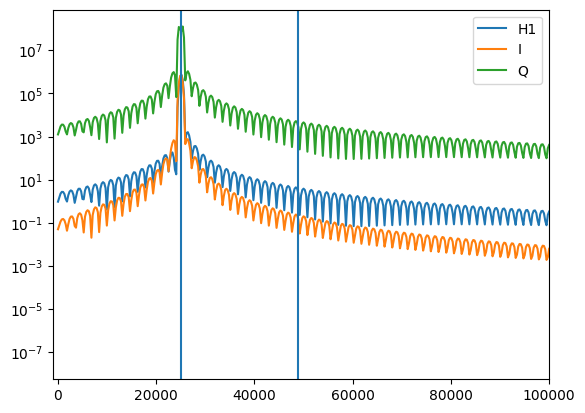

In [8]:
args = {"A":1.1157102379780006, "τ":0.024, "λ":1, "α":2*np.pi*-199, "ω":2*np.pi*3981}

# number of samples
N = 20000

# time and actual pulse
t = np.linspace(0,args["τ"], N)
y = H1_coeffs(t,args)

# freqs and values of transform
xf = 2*np.pi*(rfftfreq(len(t), args["τ"]/N))

yf1 = rfft(H1_coeffs(t,args))
yf2 = rfft(Ω(t,args["A"],args["τ"])*np.cos(args["ω"]*t))
yf3 = rfft(Ωprime(t,args["A"],args["τ"])*np.sin(args["ω"]*t))

# yretr = irfft(yf)

# xf = fftshift(xf)
# yf = np.abs(fftshift(yf))

yf1 = np.abs(yf1)
yf2 = np.abs(yf2)
yf3 = np.abs(yf3)

plt.plot(xf,yf1)
plt.plot(xf,yf2)
plt.plot(xf,yf3)
plt.yscale("log")
plt.axvline(args["ω"])
plt.axvline((2*args["ω"]+args["α"]))
plt.legend(["H1","I","Q"])
plt.gca().set_xlim(-1000, 100000)
plt.show()

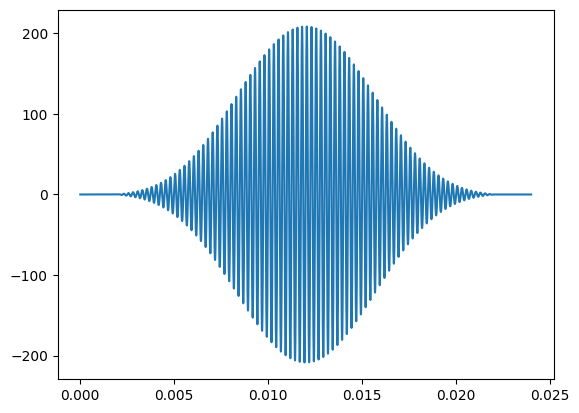

In [9]:
plt.plot(t, H1_coeffs(t,args))
plt.show()